In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

%matplotlib inline

## EDA

In [2]:
df = pd.read_csv('/Users/iris/Documents/projects/fletcher/Reviews.csv')

In [3]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
df_working = df.dropna()

In [9]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568411 non-null int64
ProductId                 568411 non-null object
UserId                    568411 non-null object
ProfileName               568411 non-null object
HelpfulnessNumerator      568411 non-null int64
HelpfulnessDenominator    568411 non-null int64
Score                     568411 non-null int64
Time                      568411 non-null int64
Summary                   568411 non-null object
Text                      568411 non-null object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [10]:
## Interestingly, most reviews are positive (mean is 4.18)

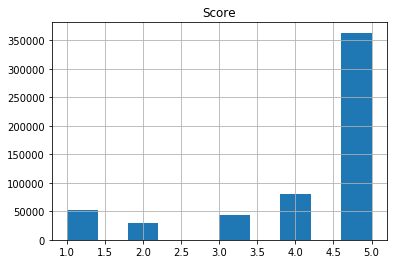

In [11]:
df_working.hist(column='Score');

In [12]:
## Check out out how many of each score there is
score_counts = df_working.Score.value_counts().to_dict()
score_counts

{5: 363111, 4: 80655, 1: 52264, 3: 42638, 2: 29743}

In [13]:
## What review was the most helpful one? (With a HelpfulnessNumerator 866)
df_working.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [14]:
c = 0.0000001
df_working['HelpfulnessNumerator'].apply(lambda x: np.log(c + x))
df_working.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


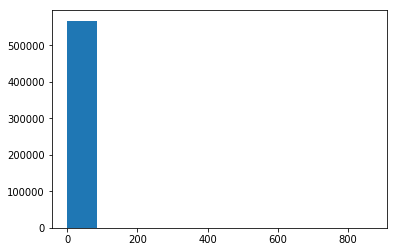

In [15]:
plt.hist(df['HelpfulnessNumerator']);

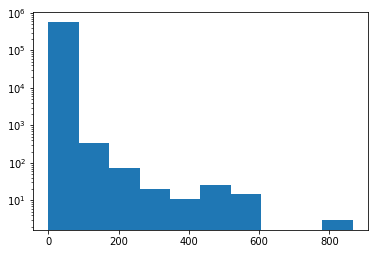

In [16]:
plt.hist(df['HelpfulnessNumerator'], log=True);

In [17]:
super_help = pd.Series(range(600,1000))

In [18]:
df_working.loc[df_working['HelpfulnessNumerator'].isin(super_help)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...
207712,207713,B00012182G,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844,923,3,1252368000,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."
566779,566780,B001PQTYN2,A1QB2Y8GSME58Y,Benjamin Chodroff,808,815,5,1260748800,sauce not for mortals,I purchased a burrito from a small shop a few ...


In [19]:
df_working.loc[df_working['HelpfulnessNumerator'] == 0].count()

Id                        303813
ProductId                 303813
UserId                    303813
ProfileName               303813
HelpfulnessNumerator      303813
HelpfulnessDenominator    303813
Score                     303813
Time                      303813
Summary                   303813
Text                      303813
dtype: int64

In [20]:
df_working.loc[df_working['HelpfulnessDenominator'] == 0].count()

Id                        270039
ProductId                 270039
UserId                    270039
ProfileName               270039
HelpfulnessNumerator      270039
HelpfulnessDenominator    270039
Score                     270039
Time                      270039
Summary                   270039
Text                      270039
dtype: int64

More than half of the reviews (303813) have zero positive votes. <br>
~ half of the reviews (270039) have zero negative votes. <br>

In [21]:
## What was the lest helpful review?
df_working.loc[df_working['HelpfulnessDenominator'] == 923]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
207712,207713,B00012182G,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844,923,3,1252368000,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."


In [22]:
df_working.loc[df_working.HelpfulnessDenominator == 923, 'Text'].iloc[0]

'I ordered one of these Fresh "Whole" Rabbits, but when it arrived its head, fur and insides were missing.  Not exactly whole, I\'d say!  Maybe it was just damaged during shipping, but I won\'t be buying another one.  I mean - without the long ears, how do I know it even WAS a rabbit?  It was the same size and shape as a cat...not that I\'ve seen a cat with its head, fur and insides missing.  I mean, not like really close or anything.<br /><br />On the plus side, it was delicious with a tall, cold glass of Tuscan Milk, so I give it three stars.  That\'s three WHOLE stars, BTW.'

In [23]:
df_working.loc[df_working.HelpfulnessNumerator == 866, 'Text'].iloc[0]

"see update at end of review<br /><br />******************<br /><br />I was lamenting about only having frech lettuce, herbs, chives, and tomatoes from may garden during the long fall-winter-spring parts of the year. The refrigerated stuff from the grocery store goes bad right away and does not taste as good as the fresh stuff from the garden, either.<br /><br />Then I saw a Time Magazine page on the new AeroGrow AeroGarden, and I just had to try it out. After reading the AeroGrow website before making the purchase, I realized that buying one garden would not work for me, as the tomatoes cannot be grown in the same garden as lettuce & herbs. This is partially due to the large amount of room taken up by the tomatoes, and also because the lamp/watering cycle is different and finally because the nutrients are different.<br /><br />So, I bought two gardens, along with the Salad Greens seed kit and Cherry Tomato seed kit. Each garden comes with a mixed herb kit, so I figured to mix in a few

In [24]:
df_working.loc[df_working.HelpfulnessNumerator == 808, 'Text'].iloc[0]

'I purchased a burrito from a small shop a few blocks from home. I was unimpressed with their habanero "hot" salsa. Eager to kick it up a notch, I reached for a bottle of what I later found to be Dave\'s Gourmet Ghost Pepper Jolokia Hot Sauce. I unscrewed the top and went to put a dab on. I quickly realized that there was no flow regulation but not before a large pool of the magma colored liquid dripped into my lunch. I decided to dab my finger in it and see what I was dealing with. It was formidable, sweet and flavorful with a long heat. I thought I could take the heat.<br /><br />I demolished the burrito, hot sauce and all, and shrugged off the pain. Every bite was saturated with the taste of a thousand tortured souls but the guacamole still tasted great. I wiped my tingling lips and while downing a glass of water I looked at the bottle. It claimed a heat rating of "Insanity++." I headed home thinking surely the worst must be over. I\'ve ate plenty of hot food and my stomach is battl

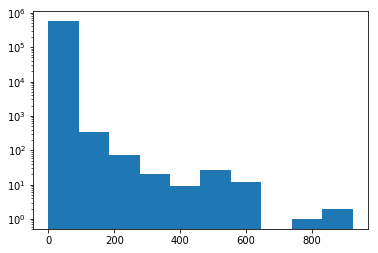

In [25]:
plt.hist(df_working.HelpfulnessDenominator, log = True);

In [26]:
df_working['HelpfulnessNumerator'].max()

866

In [27]:
df_working[(df['HelpfulnessDenominator'] >= 700)]
#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]

/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...
207712,207713,B00012182G,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844,923,3,1252368000,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."
566779,566780,B001PQTYN2,A1QB2Y8GSME58Y,Benjamin Chodroff,808,815,5,1260748800,sauce not for mortals,I purchased a burrito from a small shop a few ...


The three reviews with ultra high Numerator and Denominator scores can be eliminated from analysis as they can be deemed outliers. They generate a lot of engagement based, however it is not something the model can learn much from.

In [28]:
## There are only 3 reviews with such high engagement. I will reove them as outliers.
df_working = df_working[df_working.HelpfulnessDenominator < 800]

Helpfulness Denominator without outliers


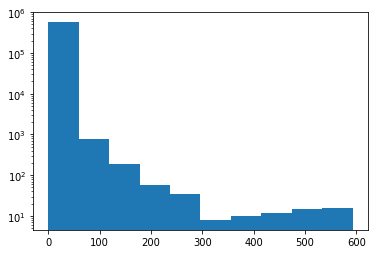

In [29]:
print('Helpfulness Denominator without outliers')
plt.hist(df_working.HelpfulnessDenominator, log = True);

Helpfulness Numerator without outliers


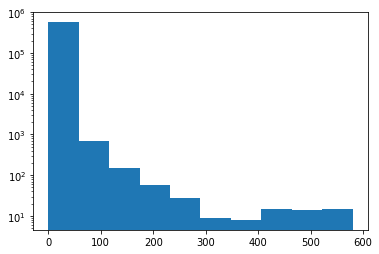

In [30]:
print('Helpfulness Numerator without outliers')
plt.hist(df_working.HelpfulnessNumerator, log = True);

In [31]:
#Reviews with no up/ down votes are not useful. I will only explore reviews that have 10 or more votes to "learn" from 
df_10 = df_working[(df_working.HelpfulnessDenominator > 10)]
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21434 entries, 32 to 568324
Data columns (total 10 columns):
Id                        21434 non-null int64
ProductId                 21434 non-null object
UserId                    21434 non-null object
ProfileName               21434 non-null object
HelpfulnessNumerator      21434 non-null int64
HelpfulnessDenominator    21434 non-null int64
Score                     21434 non-null int64
Time                      21434 non-null int64
Summary                   21434 non-null object
Text                      21434 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [32]:
df_10.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,21434.000000,21434.000000,21434.000000,21434.000000,2.143400e+04
mean,286687.916021,19.856443,24.672436,3.407110,1.251707e+09
std,161358.803730,32.172742,33.005355,1.748039,5.669619e+07
min,33.000000,0.000000,11.000000,1.000000,9.482400e+08
25%,151896.500000,9.000000,13.000000,1.000000,1.212192e+09
50%,288111.500000,13.000000,16.000000,4.000000,1.260403e+09
75%,426458.250000,20.000000,24.000000,5.000000,1.295914e+09
max,568325.000000,580.000000,593.000000,5.000000,1.350605e+09


In [33]:
#df_10 = df_working[(df_working.HelpfulnessNumerator > 10)]
#df_10

In [34]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21434 entries, 32 to 568324
Data columns (total 10 columns):
Id                        21434 non-null int64
ProductId                 21434 non-null object
UserId                    21434 non-null object
ProfileName               21434 non-null object
HelpfulnessNumerator      21434 non-null int64
HelpfulnessDenominator    21434 non-null int64
Score                     21434 non-null int64
Time                      21434 non-null int64
Summary                   21434 non-null object
Text                      21434 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [35]:
#The data set is significantly smaller
df_10.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...
33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,Good Instant,This is a good instant oatmeal from the best o...


## Text clean up 

### Remove extra characters from each text string

In [36]:
##Remove extra chars
df_10.Text = df_10.Text.str.replace('^a-zA-Z', '')
df_10.Text = df_10.Text.str.replace('!', '')
df_10.Text = df_10.Text.str.replace('?', '')
df_10.Text = df_10.Text.str.replace('.', '')
df_10.Text = df_10.Text.str.replace(',', '')
df_10.Text = df_10.Text.str.replace('-', '')
df_10.Text = df_10.Text.str.replace(')', '')
df_10.Text = df_10.Text.str.replace('(', '')
df_10.Text = df_10.Text.str.replace('=', '')
df_10.Text = df_10.Text.str.replace('+', '')
df_10.Text = df_10.Text.str.replace('-', '')
df_10.Text = df_10.Text.str.replace('``', '')
df_10.Text = df_10.Text.str.replace('/d+', '')
df_10.Text = df_10.Text.str.replace('<', '')
df_10.Text = df_10.Text.str.replace('>', '')
df_10.Text = df_10.Text.str.replace('br', '')
df_10.Text = df_10.Text.str.replace('/', '')
'''
df_10.Text = df_10.Text.str.replace('#', '')
df_10.Text = df_10.Text.str.replace('$', '')
df_10.Text = df_10.Text.str.replace('%', '')
df_10.Text = df_10.Text.str.replace('&', '')
df_10.Text = df_10.Text.str.replace("'", '')
df_10.Text = df_10.Text.str.replace("''", '')
df_10.Text = df_10.Text.str.replace('`', '')
df_10.Text = df_10.Text.str.replace("'0", '')
df_10.Text = df_10.Text.str.replace("'04", '')
df_10.Text = df_10.Text.str.replace("'09", '')
df_10.Text = df_10.Text.str.replace("'1", '')
df_10.Text = df_10.Text.str.replace("'10", '')
df_10.Text = df_10.Text.str.replace("'2", '')
df_10.Text = df_10.Text.str.replace("'3", '')
df_10.Text = df_10.Text.str.replace("'50s", '')
df_10.Text = df_10.Text.str.replace("'5hour", '')
df_10.Text = df_10.Text.str.replace("'60", '')
df_10.Text = df_10.Text.str.replace("'60s", '')
df_10.Text = df_10.Text.str.replace("'70", '')
df_10.Text = df_10.Text.str.replace("'70s", '')
df_10.Text = df_10.Text.str.replace("'80s", '')
df_10.Text = df_10.Text.str.replace("'93", '')
'''
df_10.Summary = df_10.Summary.str.replace('a-zA-Z', '')
df_10.Summary = df_10.Summary.str.replace('!', '')
df_10.Summary = df_10.Summary.str.replace('?', '')
df_10.Summary = df_10.Summary.str.replace('.', '')
df_10.Summary = df_10.Summary.str.replace(',', '')
df_10.Summary = df_10.Summary.str.replace('-', '')
df_10.Summary = df_10.Summary.str.replace(')', '')
df_10.Summary = df_10.Summary.str.replace('(', '')
df_10.Summary = df_10.Summary.str.replace('=', '')
df_10.Summary = df_10.Summary.str.replace('+', '')
df_10.Summary = df_10.Summary.str.replace('-', '')
df_10.Summary = df_10.Summary.str.replace('``', '')
df_10.Summary = df_10.Summary.str.replace('/d+', '')
df_10.Summary = df_10.Summary.str.replace('<', '')
df_10.Summary = df_10.Summary.str.replace('>', '')
df_10.Summary = df_10.Summary.str.replace('br', '')
df_10.Summary = df_10.Summary.str.replace('/', '')

/Users/iris/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Make all characters in a string lower case

In [37]:
## Convert all characters to lowercase
df_10['Text'] = df_10['Text'].str.lower()
df_10['Summary'] = df_10['Summary'].str.lower()
df_10.head()

/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,best of the instant oatmeals,mccann's instant oatmeal is great if you must ...
33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,good instant,this is a good instant oatmeal from the best o...
82,83,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,forget molecular gastronomy this stuff rockes...,i know the product title says molecular gastro...
158,159,B000ITVLE2,A3NID9D9WMIV01,"Louie Arrighi ""Lou da Joo""",17,19,5,1260057600,tastes very fresh,"span class""tiny"" length:: 0:26 mins spanthe e..."
287,288,B001UJEN6C,A1XM65S80UQ2MD,Joseph Kagan,13,13,5,1276214400,great natural energy,this is a fantastic product and i wish it was ...


### Tokenization

In [38]:
df_10.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,best of the instant oatmeals,mccann's instant oatmeal is great if you must ...
33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,good instant,this is a good instant oatmeal from the best o...


In [39]:
## Tokenize Summary column
import nltk
tokens_s = []
for elem in df_10.Summary:
    sentence = elem
    token = nltk.word_tokenize(sentence)
    tokens_s.append(token)

tokens_s[:2]

[['best', 'of', 'the', 'instant', 'oatmeals'], ['good', 'instant']]

In [40]:
## Tokenize text column
tokens_t = []
for elem in df_10.Text:
    sentence = elem
    token = nltk.word_tokenize(sentence)
    tokens_t.append(token)

tokens_t[:1]

[['mccann',
  "'s",
  'instant',
  'oatmeal',
  'is',
  'great',
  'if',
  'you',
  'must',
  'have',
  'your',
  'oatmeal',
  'but',
  'can',
  'only',
  'scrape',
  'together',
  'two',
  'or',
  'three',
  'minutes',
  'to',
  'prepare',
  'it',
  'there',
  'is',
  'no',
  'escaping',
  'the',
  'fact',
  'however',
  'that',
  'even',
  'the',
  'best',
  'instant',
  'oatmeal',
  'is',
  'nowhere',
  'near',
  'as',
  'good',
  'as',
  'even',
  'a',
  'store',
  'and',
  'of',
  'oatmeal',
  'requiring',
  'stovetop',
  'preparation',
  'still',
  'the',
  'mccann',
  "'s",
  'is',
  'as',
  'good',
  'as',
  'it',
  'gets',
  'for',
  'instant',
  'oatmeal',
  'it',
  "'s",
  'even',
  'better',
  'than',
  'the',
  'organic',
  'allnatural',
  'ands',
  'i',
  'have',
  'tried',
  'all',
  'the',
  'varieties',
  'in',
  'the',
  'mccann',
  "'s",
  'variety',
  'pack',
  'taste',
  'good',
  'it',
  'can',
  'be',
  'prepared',
  'in',
  'the',
  'microwave',
  'or',
  'by',


In [41]:
## Check to make sure there won't be any issues adding the tokens to the data frame
print(len(tokens_t))
print(len(tokens_s))

21434
21434


### Lemmatization

In [42]:
## Lemmanize
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/iris/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

lemma_s = []
for elem in tokens_s:
    for word in elem:
        lemmatized = lmtzr.lemmatize(word)
        lemma_s.append(lemmatized)

In [44]:
lemma_s[:10]

['best',
 'of',
 'the',
 'instant',
 'oatmeal',
 'good',
 'instant',
 'forget',
 'molecular',
 'gastronomy']

In [45]:
tokens_s[:3]

[['best', 'of', 'the', 'instant', 'oatmeals'],
 ['good', 'instant'],
 ['forget',
  'molecular',
  'gastronomy',
  'this',
  'stuff',
  'rockes',
  'a',
  'coffee',
  'creamer']]

In [46]:
lemma_t = []

for elem in tokens_t:
    for word in elem:
        lemmatized_t = lmtzr.lemmatize(word)
        lemma_t.append(lemmatized_t)

In [47]:
lemma_t[:10]

['mccann',
 "'s",
 'instant',
 'oatmeal',
 'is',
 'great',
 'if',
 'you',
 'must',
 'have']

In [48]:
tokens_t[:1]

[['mccann',
  "'s",
  'instant',
  'oatmeal',
  'is',
  'great',
  'if',
  'you',
  'must',
  'have',
  'your',
  'oatmeal',
  'but',
  'can',
  'only',
  'scrape',
  'together',
  'two',
  'or',
  'three',
  'minutes',
  'to',
  'prepare',
  'it',
  'there',
  'is',
  'no',
  'escaping',
  'the',
  'fact',
  'however',
  'that',
  'even',
  'the',
  'best',
  'instant',
  'oatmeal',
  'is',
  'nowhere',
  'near',
  'as',
  'good',
  'as',
  'even',
  'a',
  'store',
  'and',
  'of',
  'oatmeal',
  'requiring',
  'stovetop',
  'preparation',
  'still',
  'the',
  'mccann',
  "'s",
  'is',
  'as',
  'good',
  'as',
  'it',
  'gets',
  'for',
  'instant',
  'oatmeal',
  'it',
  "'s",
  'even',
  'better',
  'than',
  'the',
  'organic',
  'allnatural',
  'ands',
  'i',
  'have',
  'tried',
  'all',
  'the',
  'varieties',
  'in',
  'the',
  'mccann',
  "'s",
  'variety',
  'pack',
  'taste',
  'good',
  'it',
  'can',
  'be',
  'prepared',
  'in',
  'the',
  'microwave',
  'or',
  'by',


## Labeling

Huge class impbalance if I restrict the Helpfulness Numerator column to be more than 10.
I will try to instead only restrict the Denomincator. 

In [49]:
df_helpful = df_working[(df_working.HelpfulnessDenominator) > 10]

In [50]:
df_helpful['helpfullness_ratio'] = df_helpful.HelpfulnessNumerator/df_helpful.HelpfulnessDenominator

/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


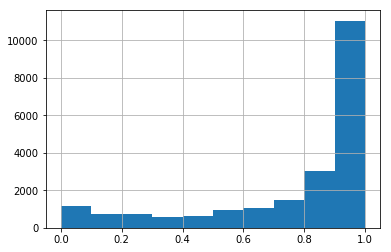

In [51]:
df_helpful.helpfullness_ratio.hist()

In [52]:
df_helpful.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,helpfullness_ratio
count,21434.000000,21434.000000,21434.000000,21434.000000,2.143400e+04,21434.000000
mean,286687.916021,19.856443,24.672436,3.407110,1.251707e+09,0.765964
std,161358.803730,32.172742,33.005355,1.748039,5.669619e+07,0.291231
min,33.000000,0.000000,11.000000,1.000000,9.482400e+08,0.000000
25%,151896.500000,9.000000,13.000000,1.000000,1.212192e+09,0.666667
50%,288111.500000,13.000000,16.000000,4.000000,1.260403e+09,0.909091
75%,426458.250000,20.000000,24.000000,5.000000,1.295914e+09,1.000000
max,568325.000000,580.000000,593.000000,5.000000,1.350605e+09,1.000000


In [53]:
helpfulness_array = (df_10.loc[:, 'HelpfulnessNumerator'] / df_10.loc[:, 'HelpfulnessDenominator'])

In [54]:
helpfulness_array.mean()

0.7659640764320166

In [55]:
df_helpful.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfullness_ratio
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,1.0


In [56]:
df_helpful.sort_values(by=['helpfullness_ratio'])

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfullness_ratio
345221,345222,B0006PXTFC,A1R3649SHF8ASD,"I lUv EaMoN! ""if you don't like eamon""",0,12,1,1124582400,Yogurt Sucks,"Yogurt sucks bad enough, then they make it int...",0.0
210128,210129,B0009YUGAG,A2S3YG4P84D3S8,VitaHound,0,13,3,1289520000,VitaHound Recommends for Cleaning Dog Teeth,This product contains high quality sources for...,0.0
551262,551263,B0016J7LKG,A3EVLTA43AQSVL,T. Hett,0,15,5,1231718400,Tea,I gave up breastfeeding before the tea arrived...,0.0
315801,315802,B002BHSKAC,A1Z1994AFE56P1,Hillary,0,25,1,1272412800,Side Effects,My husband and I were excited to try this prod...,0.0
314970,314971,B004OW342G,A1GCFTFXELCHRP,Big Texas,0,19,1,1315008000,Overpriced,This is the most expensive coconut juice I hav...,0.0
12455,12456,B000FBM3YK,A1FEP94TP15RG0,J. H. Baker,0,11,1,1245715200,"These ""Butter Leaves"" are addictively wonderful!",Amazon sends you TWELVE boxes of these fabulou...,0.0
12454,12455,B000FBM3YK,A1FEP94TP15RG0,J. H. Baker,0,11,1,1245715200,Hazelnut (Filberts) in a fragile crescent shap...,Delicate ground hazelnut cookies for a Ladies ...,0.0
314969,314970,B004OW342G,AAC9EACF42U0K,"Fatih Korkmaz ""Bongojiggy""",0,18,1,1312761600,not very good,"horrible, tastes like they poured sugar into e...",0.0
464908,464909,B000CPYVGM,A56Z4L13E0PQ9,"Gilda Barnes ""Butterfly Hunter""",0,15,2,1317600000,"""Arazona Vanilla"" is ""Halaleveryday""",The Mexican beans that I ordered from Arizona ...,0.0
464799,464800,B000UBD88A,A10I3GPBSB5MEE,"Michael L. Suter ""FTIENG1""",0,16,1,1231372800,COFFEE,BEST COFFEE ON THE MARKET. HAVE IT EVERY MORN...,0.0


In [57]:
## Look at 10717th value in sorted df_helpful to get the midpoint of helpfulness
#df.loc[[10717]]
df_helpful.sort_values(by=['helpfullness_ratio']).iloc[[10717]]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfullness_ratio
191782,191783,B000OCRNCW,A38F3EPL17QIZJ,Rose,10,11,5,1298678400,Great for dogs with sensitive stomachs!,My 7 year old border collie has a very sensiti...,0.909091


In order to end up with balanced Helpful and Not_Helpful classes, I will try labeling half the data as each of the classes. The helpfulness ratio that partitions the data in half in .909091

In [58]:
df_helpful_working = df_helpful
df_helpful_working['Helpful'] = df_helpful.loc[:, 'Helpful'] = np.where(df_helpful.loc[:,'HelpfulnessNumerator'] /
                                       df_helpful.loc[:, 'HelpfulnessDenominator'] > 0.909, 1, 0)
df_helpful_working.head()

/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/iris/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfullness_ratio,Helpful
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,1.000000,1
33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,Good Instant,This is a good instant oatmeal from the best o...,1.000000,1
82,83,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rocke...,I know the product title says Molecular Gastro...,1.000000,1
158,159,B000ITVLE2,A3NID9D9WMIV01,"Louie Arrighi ""Lou da Joo""",17,19,5,1260057600,tastes very fresh,"<span class=""tiny""> Length:: 0:26 Mins<br /><b...",0.894737,0
287,288,B001UJEN6C,A1XM65S80UQ2MD,Joseph Kagan,13,13,5,1276214400,Great Natural Energy,"This is a fantastic product, and I wish it was...",1.000000,1


In [59]:
#The two classes are alot more balanced now
df_helpful_working['Helpful'].value_counts()

1    10764
0    10670
Name: Helpful, dtype: int64

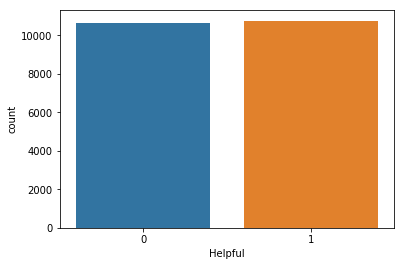

In [60]:
sns.countplot(x='Helpful', data = df_helpful_working);

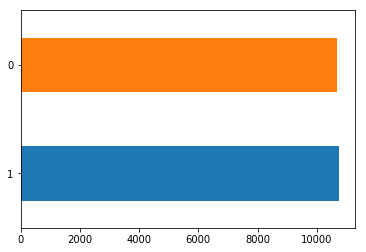

In [61]:
df_helpful_working.Helpful.value_counts().plot('barh');

In [62]:
len(lemma_t)
len(lemma_s)

105715

Appending new lemmatized and tokenized text to the column 

In [63]:
## Store data to a new clean csv
df_helpful_working.to_csv("clean_labeled_data.csv")

## Bag of Words

In [64]:
## df_1 will be the data frame I use to make initial analysis on
df_1 = df_helpful_working

In [65]:
len(df_1.Text)
df_1['Text_Token'] = tokens_t
df_1['Summ_Token'] = tokens_s

/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
df_1.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfullness_ratio,Helpful,Text_Token,Summ_Token
32,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,1.0,1,"[mccann, 's, instant, oatmeal, is, great, if, ...","[best, of, the, instant, oatmeals]"
33,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,13,4,1166313600,Good Instant,This is a good instant oatmeal from the best o...,1.0,1,"[this, is, a, good, instant, oatmeal, from, th...","[good, instant]"


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

/Users/iris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Pre modeling investigations 
My original model will focus on the body of the review, not the title ('summary').

In [68]:
all_text_words = [word for tokens in df_1['Text_Token'] for word in tokens]
len_sentence = [len(tokens) for tokens in df_1['Text_Token']]
vocabulary = sorted(list(set(all_text_words)))

In [69]:
print(vocabulary[:100])

['#', '$', '%', '&', "'", "''", "'0", "'04", "'09", "'1", "'10", "'2", "'3", "'50s", "'5hour", "'60", "'60s", "'70", "'70s", "'80s", "'93", "'a", "'accidents", "'activate", "'add", "'additives", "'adjusting", "'adquired", "'ahmad", "'alive", "'all", "'allow", "'almond", "'amazon", "'american", "'an", "'any", "'are", "'artificial", "'artis", "'artisian", "'asian", "'asianamerican", "'asking", "'asphalt", "'at", "'attention", "'au", "'autolyzed", "'bad", "'bait", "'bazar", "'beanier", "'beany", "'bed", "'beetlejuice", "'behavior", "'benefits", "'berry", "'best", "'better", "'big", "'bite", "'bitey", "'bitter", "'black", "'blend", "'blossoms", "'body", "'bold", "'bolt", "'bones", "'born", "'boss", "'bottles", "'bout", "'boutique", "'branched", "'bubblegum'enjoy", "'burnt", "'butter", "'butterflavored", "'buttery", "'buttery'which", "'buzz", "'caf", "'cafe", "'can", "'canned", "'carb", "'carbonated", "'category", "'cause", "'cell", "'champagne", "'cheese", "'cheezy", "'chemicalinfused", "'

In [70]:
print('There are %s words total. The vocabulary is %s' % (len(all_text_words), len(vocabulary)))

There are 3175298 words total. The vocabulary is 49311


In [77]:
def cv(df):
    count_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
    emb = count_vectorizer.fit_transform(df)
    return emb, count_vectorizer

list_text = df_1['Text_Token'].tolist()
list_label = df_1['Helpful'].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_text, list_label, test_size=0.2, 
                                                   random_state = 42)

In [78]:
X_train_counts, count_vectorizer = cv(X_train)
X_text_counts = count_vectorizer.transform(X_test)

In [79]:
X_text_counts

<4287x44328 sparse matrix of type '<class 'numpy.int64'>'
	with 377272 stored elements in Compressed Sparse Row format>

## Visualizing Classified Data

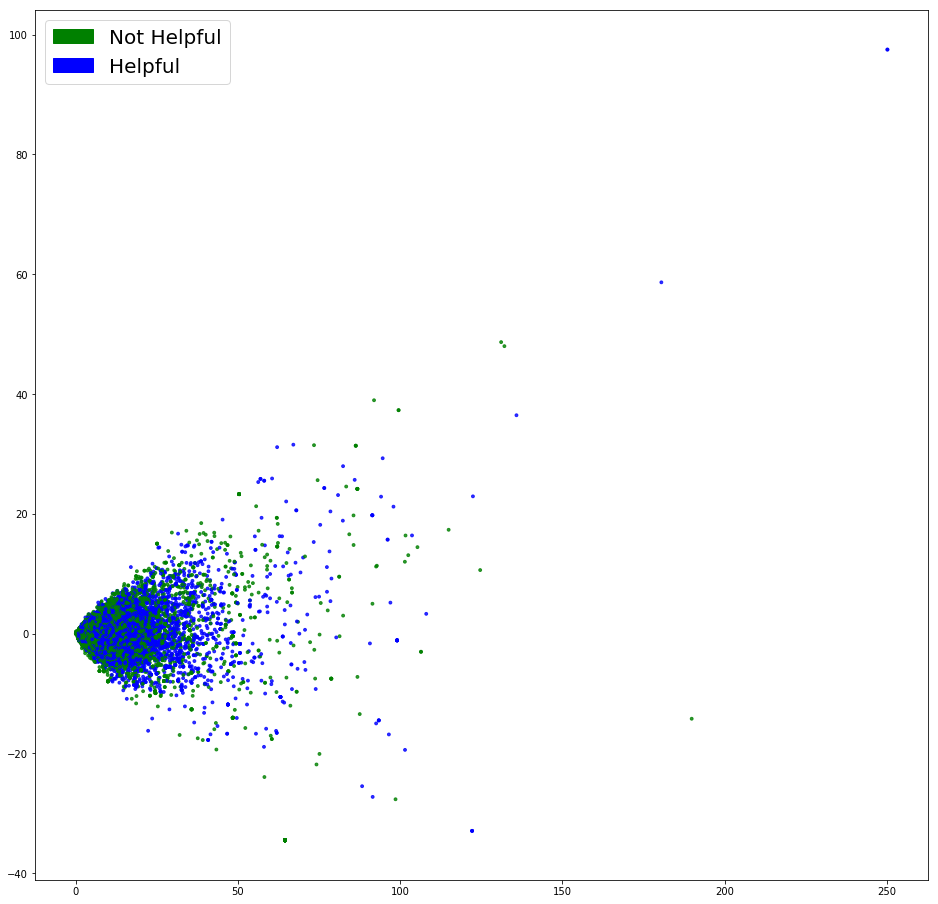

In [117]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['green','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='green', label='Not Helpful')
            green_patch = mpatches.Patch(color='blue', label='Helpful')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 20})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

## Fitting a classifier 

In [81]:
X_train_counts, count_vectorizer = cv(X_train)
X_text_counts = count_vectorizer.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=42)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_text_counts)

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.783, precision = 0.783, recall = 0.783, f1 = 0.783


## Confusion

In [120]:
confusion_matrix(y_test, y_predicted_counts)

array([[1729,  463],
       [ 469, 1626]])

In [126]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('Actual Category', fontsize=20)
    plt.xlabel('Predicted Category', fontsize=20)

    return plt

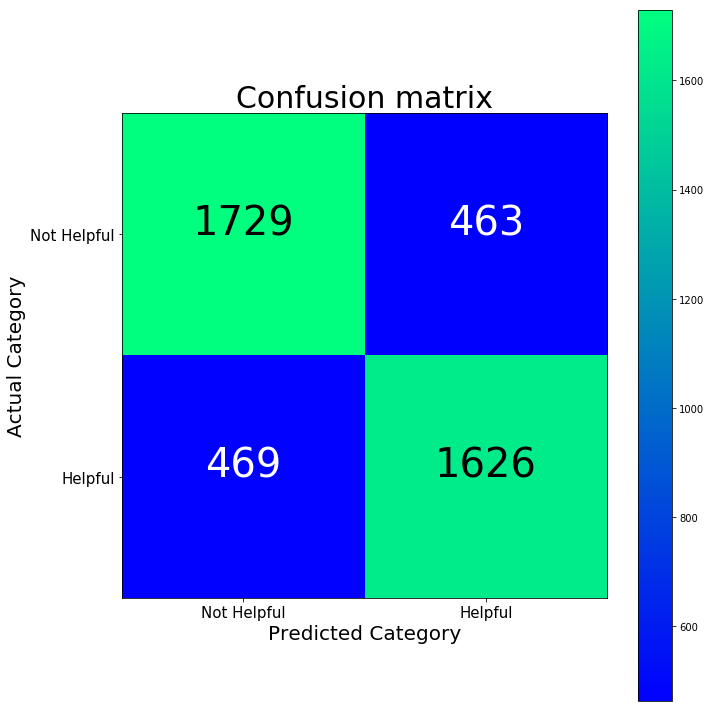

[[1729  463]
 [ 469 1626]]


In [127]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Not Helpful','Helpful'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

## Common words

In [84]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [85]:
print(importance)

{0: {'tops': [(2.5568034181267514, 'kellogs'), (2.5882183765159015, 'discard'), (2.6306898903555056, 'mints'), (2.660912438634168, 'sugarcream'), (2.714434001217805, 'exploring'), (2.8104065464459587, '548'), (2.949281608756618, 'fresher'), (3.1072864574401535, 'toddler'), (3.144493509875496, 'easytouse'), (4.09172583845323, 'tinted')], 'bottom': [(-2.6046121657495647, 'himalayan'), (-2.7538244905428217, 'jumbo'), (-2.7579333573176834, 'factoryproducer'), (-2.8744670425271472, 'replacements'), (-2.9587748509922625, 'cadbury'), (-2.971145388714295, 'asks'), (-3.0642921964814365, 'bound'), (-3.166063363391709, 'twenty'), (-3.173401939182383, 'freezedried'), (-3.4648593842374495, 'threeyearold')]}}


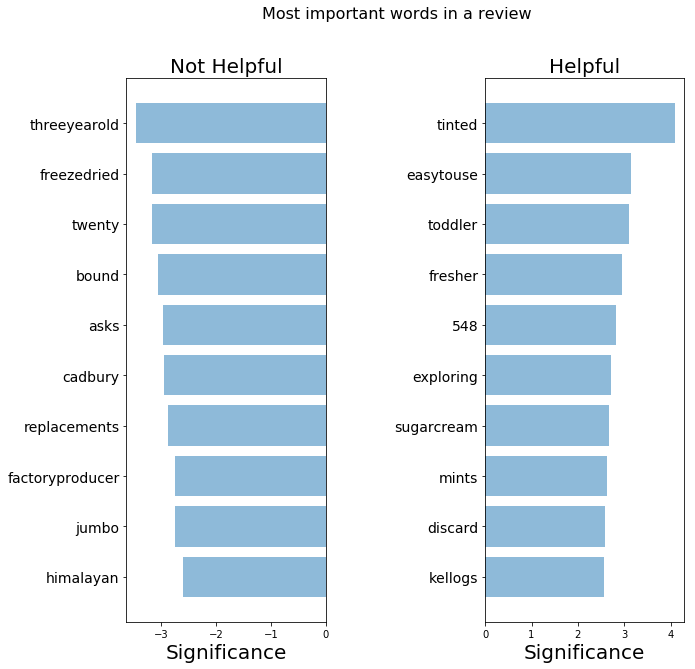

In [86]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Not Helpful', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Significance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Helpful', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Significance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words in a review")

## LDA and NMF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [88]:
## Dispaling the top topical words the models
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [89]:
no_features = 1000

count_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
emb = count_vectorizer.fit_transform(df)

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english',tokenizer=lambda doc: doc, lowercase=False)
tfidf = tfidf_vectorizer.fit_transform(list_text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english',tokenizer=lambda doc: doc, lowercase=False)
tf = tf_vectorizer.fit_transform(list_text)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
's n't food '' like product `` just good tea
Topic 1:
coffee cup keurig kcups kcup bold 's blend roast flavor
Topic 0:
's '' like n't `` taste coffee : good flavor
Topic 1:
food n't 's product just dog did like day ''


In [90]:
no_topics = 5

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
's n't '' like `` taste just product : good
Topic 1:
coffee cup keurig kcups kcup bold roast blend 's strong
Topic 2:
tea green teas bags drink taste like drinking 's leaf
Topic 3:
food dog cat dogs cats 's eating diet ingredients n't
Topic 4:
$ amazon price product buy box shipping order bag store
Topic 0:
coffee 's amazon $ '' product n't box like price
Topic 1:
n't just 's like time did use water 'm great
Topic 2:
'' `` tea 's : product oil sugar coconut water
Topic 3:
like 's taste n't flavor good chocolate salt just great
Topic 4:
food dog 's n't cat dogs eating eat cats diet


In [91]:
no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
's n't like taste just good flavor chocolate sugar 've
Topic 1:
coffee cup keurig kcups kcup bold roast blend 's strong
Topic 2:
tea green teas bags drink drinking taste leaf like leaves
Topic 3:
food cat cats eating diet 's ingredients science eat wellness
Topic 4:
product amazon order received ordered box shipping company item arrived
Topic 5:
'' `` : http href organic natural 's ingredients ;
Topic 6:
oil coconut olive use hair skin oils water organic cooking
Topic 7:
$ price buy amazon shipping store bag local cost pack
Topic 8:
salt chips sea flavor potato kettle table minerals salty use
Topic 9:
dog dogs treats food china treat bag vet problems loves
Topic 0:
coffee 's cup like keurig blend beans kcups '' dark
Topic 1:
n't time just did work use day help little does
Topic 2:
tea water oil use coconut 's taste like green add
Topic 3:
sugar chocolate milk fat taste protein : like calories bars
Topic 4:
food eating n't day 's got just little really diet
Topic 5:
dog food 's

In [92]:
no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
like n't taste just flavor good really great did tried
Topic 1:
coffee cup keurig kcups kcup bold roast blend strong coffees
Topic 2:
tea green teas bags drink drinking leaf leaves black taste
Topic 3:
food cat cats ingredients foods pet eat diet vet dry
Topic 4:
$ price buy store shipping cost bag local pay cheaper
Topic 5:
'' `` href http organic : say new msg vegan
Topic 6:
oil coconut olive hair use skin oils butter popcorn cooking
Topic 7:
dog dogs treats china food treat bag vet problems loves
Topic 8:
salt sea flavor table minerals use salty spice pepper sodium
Topic 9:
: fat % & protein calories 1 bars http fiber
Topic 10:
product received products china weeks use great company buy description
Topic 11:
amazon box order ordered item shipping received arrived price bag
Topic 12:
's 've 'm 're best 'll ; little price blend
Topic 13:
milk organic powder formula baby soy powdered vanilla use add
Topic 14:
chocolate cocoa dark bars hot bar cookies butter taste candy
Topic 1

## K Means

In [93]:
## Sentiment?
km = KMeans(n_clusters=2)

In [95]:
#km.fit(X_train)

## pyLDAvis

### Convert to document-term matrix

In [96]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df_working.Text)
print(dtm_tf.shape)

(568408, 27696)


In [98]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df_working.Text)
print(dtm_tfidf.shape)

(568408, 27696)


### Fit Latent Dirichlet Allocation models

In [100]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_topics=10, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


KeyboardInterrupt: 

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)


In [ ]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)


In [113]:
subbiesub = dtm_tf[:15000]
print(subbiesub.shape)

(15000, 27696)


In [114]:
import time

start = time.time()
lda_tf = LatentDirichletAllocation(n_topics=10, random_state=0)
lda_tf.fit(subbiesub)


end = time.time()
print(end - start)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


36.14845895767212


In [115]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/iris/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
/Users/iris/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.287252  0.008296       1        1  44.348459
9      0.258843 -0.053561       2        1  22.439171
3      0.143434  0.128429       3        1   7.221231
8      0.143282 -0.020240       4        1   6.993679
4     -0.034091 -0.241101       5        1   4.349269
5     -0.101068  0.236203       6        1   3.938845
0     -0.137048  0.131366       7        1   3.576908
6     -0.199630 -0.013106       8        1   2.596081
2     -0.143919 -0.154011       9        1   2.508942
1     -0.217056 -0.022274      10        1   2.027416, topic_info=      Category           Freq         Term          Total  loglift  logprob
term                                                                       
18925  Default  154533.000000      product  154533.000000  30.0000  30.0000
776    Default   96008.000000       amazon   96008.000000  29.0000  29.0000
4604   Default  207576.000000       coffee  207576.000000  28.0000  28.0000
9473   Default  100195.000000         food  100195.000000  27.0000  27.0000
26794  Default   49049.000000        water   49049.000000  26.0000  26.0000
7448   Default   46472.000000        drink   46472.000000  25.0000  25.0000
7209   Default   77920.000000          dog   77920.000000  24.0000  24.0000
10678  Default  159978.000000        great  159978.000000  23.0000  23.0000
2700   Default   43803.000000          box   43803.000000  22.0000  22.0000
25326  Default   65747.000000       treats   65747.000000  21.0000  21.0000
15424  Default   44723.000000          mix   44723.000000  20.0000  20.0000
17181  Default   36543.000000         pack   36543.000000  19.0000  19.0000
5288   Default   35179.000000      cookies   35179.000000  18.0000  18.0000
23810  Default   53441.000000        sugar   53441.000000  17.0000  17.0000
14510  Default   72339.000000         make   72339.000000  16.0000  16.0000
21042  Default   27317.000000         salt   27317.000000  15.0000  15.0000
4141   Default   38387.000000        chips   38387.000000  14.0000  14.0000
13086  Default   25490.000000        juice   25490.000000  13.0000  13.0000
4179   Default   56591.000000    chocolate   56591.000000  12.0000  12.0000
16832  Default   43227.000000        order   43227.000000  11.0000  11.0000
14259  Default  117785.000000         love  117785.000000  10.0000  10.0000
9691   Default   49402.000000         free   49402.000000   9.0000   9.0000
26142  Default   79455.000000          use   79455.000000   8.0000   8.0000
16853  Default   42234.000000      organic   42234.000000   7.0000   7.0000
15249  Default   36459.000000         milk   36459.000000   6.0000   6.0000
16655  Default   22774.000000          oil   22774.000000   5.0000   5.0000
4725   Default   19883.000000          com   19883.000000   4.0000   4.0000
24387  Default  164684.000000        taste  164684.000000   3.0000   3.0000
10362  Default   27701.000000       gluten   27701.000000   2.0000   2.0000
22484  Default   27608.000000        snack   27608.000000   1.0000   1.0000
...        ...            ...          ...            ...      ...      ...
13342  Topic10    2372.254623          kit    2404.269708   3.8850  -5.1383
10991  Topic10    2119.336312         hair    2151.355188   3.8834  -5.2510
17430  Topic10    2075.978421         pass    2107.995992   3.8831  -5.2717
26323  Topic10    1986.020971       vendor    2018.038053   3.8824  -5.3160
15165  Topic10    1964.099655          mic    1996.111474   3.8822  -5.3271
27072  Topic10    1947.802186    wholesome    1979.822914   3.8821  -5.3354
11965  Topic10    1909.094062       icicle    1941.106217   3.8818  -5.3555
7044   Topic10    1858.712408   disposable    1890.760771   3.8813  -5.3822
9972   Topic10    1777.166162         gain    1809.193973   3.8805  -5.4271
5489   Topic10    1760.862383          cow    1792.881793   3.8804  -5.4363
22092  Topic10    1742.452195      simila

In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)